<a href="https://colab.research.google.com/github/AnhVietPham/Machine-Learning/blob/main/homemade/linear_regression/univariate/univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

https://www.kaggle.com/unsdsn/world-happiness#2017.csv

In [34]:
data = pd.read_csv('/content/2019.csv')
data.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


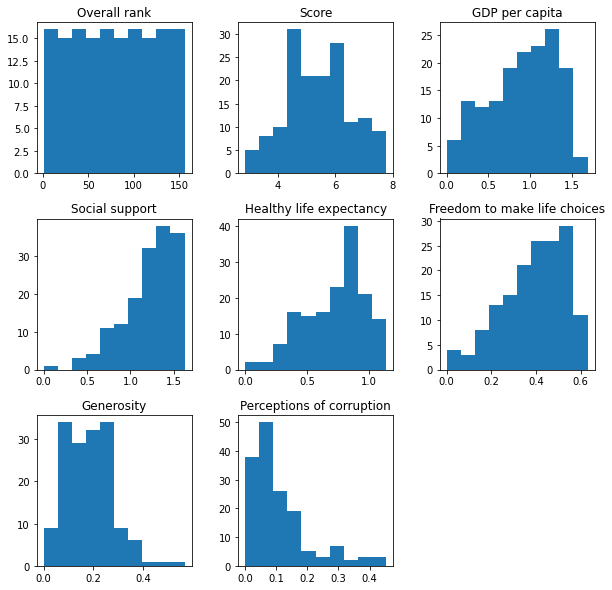

In [35]:
histograms = data.hist(grid=False, figsize=(10, 10))

In [36]:
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

In [37]:
train_data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
17,18,Belgium,6.923,1.356,1.504,0.986,0.473,0.160,0.210
76,77,Dominican Republic,5.425,1.015,1.401,0.779,0.497,0.113,0.101
45,46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006
44,45,Nicaragua,6.105,0.694,1.325,0.835,0.435,0.200,0.127
71,72,Libya,5.525,1.044,1.303,0.673,0.416,0.133,0.152
...,...,...,...,...,...,...,...,...,...
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
107,108,Venezuela,4.707,0.960,1.427,0.805,0.154,0.064,0.047
102,103,Congo (Brazzaville),4.812,0.673,0.799,0.508,0.372,0.105,0.093
123,124,Tunisia,4.461,0.921,1.000,0.815,0.167,0.059,0.055


In [38]:
test_data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
11,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182
26,27,Guatemala,6.436,0.800,1.269,0.746,0.535,0.175,0.078
31,32,Brazil,6.300,1.004,1.439,0.802,0.390,0.099,0.086
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
41,42,Lithuania,6.149,1.238,1.515,0.818,0.291,0.043,0.042
56,57,Mauritius,5.888,1.120,1.402,0.798,0.498,0.215,0.060
60,61,Bolivia,5.779,0.776,1.209,0.706,0.511,0.137,0.064


In [39]:
input_param_name = "GDP per capita"
out_param_name = "Score"

In [40]:
x_train = train_data[[input_param_name]].values
y_train = train_data[[out_param_name]].values

In [41]:
x_test = test_data[[input_param_name]].values
y_test = test_data[[out_param_name]].values

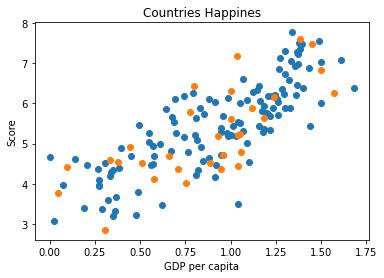

In [42]:
plt.scatter(x_train, y_train, label="Training Dataset")
plt.scatter(x_test, y_test, label="Test Dataset")
plt.xlabel(input_param_name)
plt.ylabel(out_param_name)
plt.title('Countries Happines')
plt.show()

In [43]:
def normalize(features):
    features_normalize = np.copy(features).astype(float)
    features_mean = np.mean(features, 0)
    features_deviation = np.std(features, 0)

    if features.shape[0] > 1:
        features_normalize -= features_mean

    features_deviation[features_deviation == 0] = 1
    features_normalize /= features_deviation
    return features_normalize, features_mean, features_deviation

In [44]:
def prepare_for_training(data, normalize_data=True):
    num_examples = data.shape[0]

    data_processed = np.copy(data)
    features_mean = 0
    features_deviation = 0
    data_normalized = data_processed
    if normalize_data:
        (data_normalized, features_mean, features_deviation) = normalize(data_processed)
        data_processed = data_normalized

    data_processed = np.hstack((np.ones((num_examples, 1)), data_processed))
    return data_processed, features_mean, features_deviation

In [45]:
class LinearRegression:
    def __init__(self, data, labels, normalize_data=True):
        (
            data_processed,
            features_mean,
            features_deviation
        ) = prepare_for_training(data, normalize_data)
        self.data = data_processed
        self.labels = labels
        self.features_mean = features_mean
        self.features_deviation = features_deviation
        self.normalize_data = normalize_data

        num_features = self.data.shape[1]
        self.theta = np.zeros((num_features, 1))

    def train(self, alpha, num_iteration=500):
        cost_history = self.gradient_descent(alpha, num_iteration)
        return self.theta, cost_history

    def gradient_descent(self, alpha, num_iteration):
        cost_history = []
        for _ in range(num_iteration):
            self.gradient_step(alpha)
            cost_history.append(self.cost_function(self.data, self.labels))
        return cost_history

    def gradient_step(self, alpha):
        num_examples = self.data.shape[0]
        predictions = LinearRegression.hypothesis(self.data, self.theta)
        delta = predictions - self.labels
        theta = self.theta
        theta = theta - alpha * (1 / num_examples) * (delta.T @ self.data).T
        self.theta = theta

    def predict(self, data):
        data_processed = prepare_for_training(
            data,
            self.normalize_data,
        )[0]
        predictions = LinearRegression.hypothesis(data_processed, self.theta)
        return predictions

    def get_cost(self, data, labels):
      data_processed = prepare_for_training(
            data,
            self.normalize_data,
        )[0]
      return self.cost_function(data_processed, labels)

    def cost_function(self, data, labels):
        num_examples = data.shape[0]
        delta = LinearRegression.hypothesis(data, self.theta) - labels

        cost = (1 / 2 * num_examples) * (delta.T @ delta)

        return cost[0][0]

    @staticmethod
    def hypothesis(data, theta):
        predictions = data @ theta
        return predictions

In [46]:
input_param_name = "GDP per capita"
out_param_name = "Score"
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)
x_train = train_data[[input_param_name]].values
y_train = train_data[[out_param_name]].values
x_test = test_data[[input_param_name]].values
y_test = test_data[[out_param_name]].values
num_iterations = 500
learning_rate = 0.01
linear_regression = LinearRegression(x_train, y_train)

In [47]:
(theta, cost_history) = linear_regression.train(learning_rate, num_iterations)

In [48]:
print('Initial cost: {:.2f}'.format(cost_history[0]))
print('Optimized cost: {:.2f}'.format(cost_history[-1]))

Initial cost: 232287.16
Optimized cost: 3255.57


In [49]:
theta_table = pd.DataFrame({'Model Parameters': theta.flatten()})
theta_table.head()

,Model Parameters
0,5.359735
1,0.891093


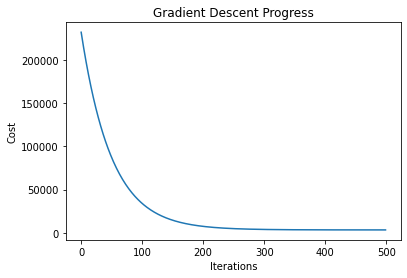

In [50]:
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
plt.show()

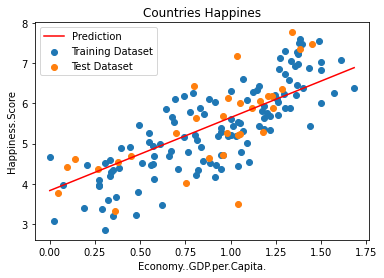

In [51]:
predictions_num = 100
x_predictions = np.linspace(x_train.min(), x_train.max(), predictions_num).reshape(predictions_num, 1);
y_predictions = linear_regression.predict(x_predictions)

plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.plot(x_predictions, y_predictions, 'r', label='Prediction')
plt.xlabel('Economy..GDP.per.Capita.')
plt.ylabel('Happiness.Score')
plt.title('Countries Happines')
plt.legend()
plt.show()

In [52]:
train_cost = linear_regression.get_cost(x_train, y_train)
test_cost = linear_regression.get_cost(x_test, y_test)
print(f'Train cost: {train_cost}')
print(f'Test cost: {test_cost}')

Train cost: 3255.571255370392
Test cost: 295.6977403502467


In [53]:
test_predictions = linear_regression.predict(x_test)
test_predictions_table = pd.DataFrame({
  'Economy GDP per Capita': x_test.flatten(),
  'Test Happiness Score': y_test.flatten(),
  'Predicted Happiness Score': test_predictions.flatten(),
  'Prediction Diff': (y_test - test_predictions).flatten()
  })
test_predictions_table.head(10)

,Economy GDP per Capita,Test Happiness Score,Predicted Happiness Score,Prediction Diff
0,1.340,7.769,6.402695,1.366305
1,1.452,7.480,6.658463,0.821537
2,1.387,7.343,6.510026,0.832974
3,1.034,7.167,5.703902,1.463098
4,0.800,6.436,5.169530,1.266470
5,1.286,6.354,6.279379,0.074621
6,1.231,6.192,6.153778,0.038222
7,1.206,6.182,6.096687,0.085313
8,0.985,6.125,5.592003,0.532997
9,1.162,6.070,5.996207,0.073793
